In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pickle
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Flatten, Dense, Conv2D,MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
# Getting Preprocessed Data
with open('/content/gdrive/MyDrive/Face_mask_detection/face_mask_data/preprocessed_data.txt', 'rb') as file:
  data = pickle.load(file)

In [ ]:
images = []
labels = []
for i in range(len(data)):
  images.append(data[i][0])
  labels.append(data[i][1])
images = np.array(images)
labels = np.array(labels)
print(images.shape, labels.shape)

(5749, 128, 128, 3) (5749,)


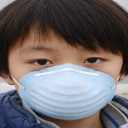

In [ ]:
image  = np.array(data[2][0])
cv_imshow(image)

In [ ]:
from sklearn.model_selection import train_test_split
# split our data into train and validation sets
train_x, test_x, train_y,test_y = train_test_split(images, labels, test_size = 0.2, random_state = 42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(4599, 128, 128, 3) (1150, 128, 128, 3) (4599,) (1150,)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='valid', input_shape=(128,128,3)))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu", padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu", padding='valid'))
model.add(Conv2D(filters= 256, kernel_size = 3, strides= (1,1), padding = 'valid', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 122, 122, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 57, 57, 256)       295168    
_________________________________________________________________
batch_normalization_1 (Batch (None, 57, 57, 256)       1

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
              loss='binary_crossentropy', metrics=['accuracy']) 
# fit the model
history = model.fit(train_x,train_y,batch_size=64,
                 epochs=20,
                 validation_data=(test_x, test_y))

Epoch 1/20
72/72 [==============================] - 40s 117ms/step - loss: 0.6266 - accuracy: 0.8109 - val_loss: 0.4527 - val_accuracy: 0.7452
Epoch 2/20
72/72 [==============================] - 6s 84ms/step - loss: 0.2678 - accuracy: 0.9046 - val_loss: 0.6115 - val_accuracy: 0.7470
Epoch 3/20
72/72 [==============================] - 6s 84ms/step - loss: 0.2538 - accuracy: 0.9157 - val_loss: 0.3181 - val_accuracy: 0.8765
Epoch 4/20
72/72 [==============================] - 6s 83ms/step - loss: 0.1890 - accuracy: 0.9256 - val_loss: 0.4252 - val_accuracy: 0.8470
Epoch 5/20
72/72 [==============================] - 6s 83ms/step - loss: 0.1286 - accuracy: 0.9521 - val_loss: 0.1958 - val_accuracy: 0.9235
Epoch 6/20
72/72 [==============================] - 6s 84ms/step - loss: 0.1280 - accuracy: 0.9486 - val_loss: 0.3226 - val_accuracy: 0.8870
Epoch 7/20
72/72 [==============================] - 6s 84ms/step - loss: 0.1036 - accuracy: 0.9584 - val_loss: 0.3336 - val_accuracy: 0.9191
Epoch 8/20


In [ ]:
print(train_x.shape, train_y.shape)

(4599, 128, 128, 3) (4599,)


In [ ]:
loss, accuracy = model.evaluate(test_x, test_y, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.2530529797077179
Test accuracy: 0.9434782862663269


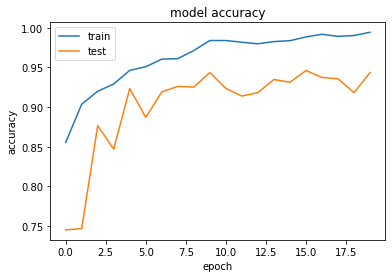

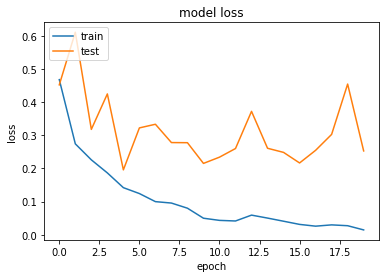

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#Confution Matrix and Classification Report
y_pred = model.predict(test_x)
y_pred = np.where(y_pred < 0.5,0,1)
# y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_y, y_pred))
print('Classification Report')
target_names = ['face_with_mask', 'face_no_mask']
print(classification_report(test_y, y_pred, target_names=target_names))


Confusion Matrix
[[284  24]
 [ 41 801]]
Classification Report
                precision    recall  f1-score   support

face_with_mask       0.87      0.92      0.90       308
  face_no_mask       0.97      0.95      0.96       842

      accuracy                           0.94      1150
     macro avg       0.92      0.94      0.93      1150
  weighted avg       0.94      0.94      0.94      1150



[0]
masked


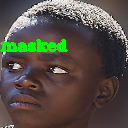

In [ ]:
i = np.random.choice(np.arange(1,len(test_y)))
print(y_pred[i])
if y_pred[0] == 1:
  text = 'masked'
else:
  text = 'no_mask'
img = test_x[i]
print(text)
cv.putText(img, text, (0, 50), cv.FONT_HERSHEY_TRIPLEX, 0.5, (0,255,0), 2)
cv_imshow(img)


In [ ]:
model.save('/content/gdrive/MyDrive/Face_mask_detection/model_1')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Face_mask_detection/model_1/assets


In [ ]:
model_1 = tf.keras.models.load_model('/content/gdrive/MyDrive/Face_mask_detection/model_1')